In [1]:
# download data
# !curl -k https://covid.ourworldindata.org/data/owid-covid-data.csv > dataset.csv

In [19]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from IPython.display import display, Math
from datetime import datetime, date

In [3]:
# constants

# data preprocessing
RUSSIA = "Russia"
START_DATE = datetime(2020, 3, 3)
# linear model fit
TRAIN_SHAPE = 51

### 1. Load dataset
Load and preprocess dataset. Main points:
1. Read dataframe from csv;
2. Filter location by "Russia", choose date and *_cases columns; 

In [4]:
!ls

README.md  ad_ml_2023.ipynb  dataset.csv


In [5]:
dataframe = pd.read_csv("dataset.csv")
dataframe["date"] = pd.to_datetime(dataframe["date"])

# filter
dataframe = dataframe[
    (dataframe["date"] >= START_DATE) & (dataframe["location"] == RUSSIA)
][["date", "total_cases", "new_cases"]].reset_index(drop=True)
# for second task change all values = 0 in new_cases to 1
dataframe['new_cases'].replace(0, 1, inplace=True)

In [6]:
# check if we have some null's
dataframe.isna().sum()

date           0
total_cases    0
new_cases      0
dtype: int64

### 2. Exponential Regression using a Linear Model

Firstly, we need to plot target columns distribution:

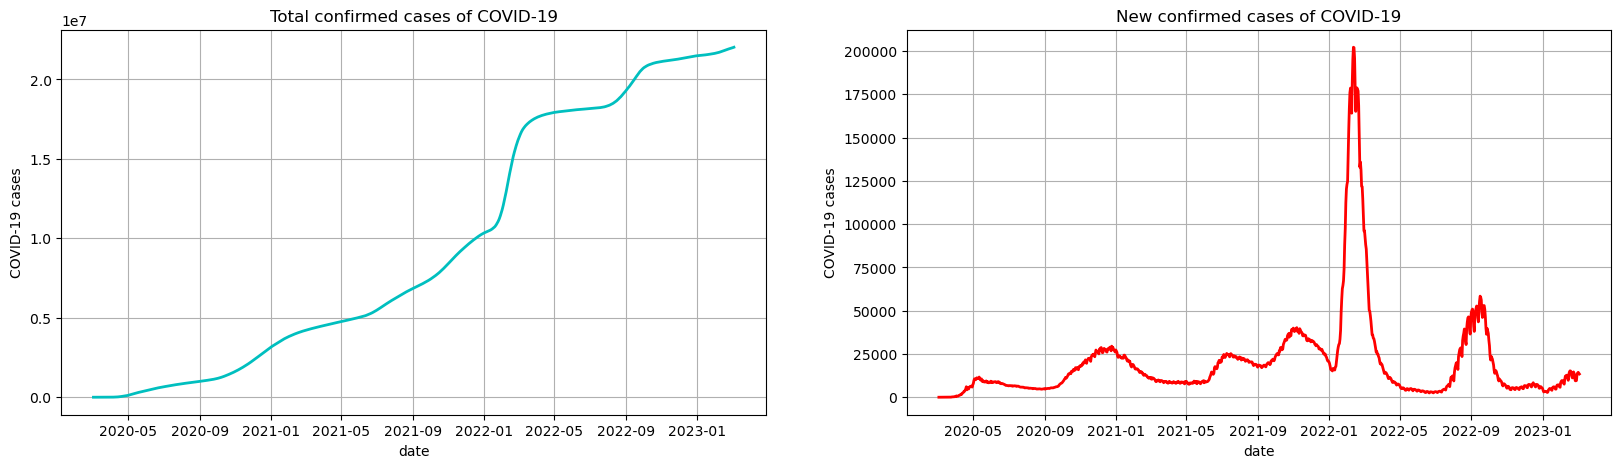

In [7]:
x, total_cases, new_cases = (dataframe[col].to_list() for col in dataframe.columns)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
# show total cases
ax1.plot(x, total_cases, linewidth=2, color="c")
ax1.set_title("Total confirmed cases of COVID-19")
ax1.set_xlabel("date")
ax1.set_ylabel("COVID-19 cases")
ax1.grid()
# show new cases
ax2.plot(x, new_cases, linewidth=2, color="r")
ax2.set_title("New confirmed cases of COVID-19")
ax2.set_xlabel("date")
ax2.set_ylabel("COVID-19 cases")
ax2.grid()
plt.show()

As we can see, data has a non-uniform distribution, which doens't have exponential type of dependency. But, there are many peaks in different peroids of timeline, where number of cases grow rapidly, drop sharply.

In [32]:
train_df, test_df = dataframe[:TRAIN_SHAPE], dataframe[:TRAIN_SHAPE]

# new_cases model
train_y = np.log(train_df["new_cases"].to_numpy())
train_x = np.arange(TRAIN_SHAPE).reshape(-1, 1)

lr_model = LinearRegression()
lr_model.fit(train_x, train_y)

display(
    Math(
        r"Model: \\ y = e^{{{0} * x + {1}}}".format(
            round(lr_model.coef_[0], 3), round(lr_model.intercept_, 3)
        )
    )
)

<IPython.core.display.Math object>

In [9]:
# Создаем обучающий набор данных
x_train = np.arange(TRAIN_SIZE).reshape(-1, 1)
# Добавим фиктивный признак, состоящий из всех единиц, для корректности вычислений
x_train_1 = np.hstack((np.ones(x_train.shape), x_train))
# Трасформация целевой переменной
y_train = transform(df[TARGET][:TRAIN_SIZE].values)
# Обучим модель
model = LinearRegression(fit_intercept = True).fit(x_train, y_train)
params = [model.intercept_, model.coef_[0]]
print('Параметры модели: ', params)

NameError: name 'TRAIN_SIZE' is not defined